In [29]:

import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
import random
import math

n = 9000 #Numero de agujas
l = 1    #Longitud de la aguja
t = 8    #Ancho del tablero



def deg_to_rad(deg):
    """La función convierte los grados en radianes"""
    return (deg * math.pi)/180

def buffon_needle(l, t, n):
    m = 0
    for _ in range(n):
        xcent = random.random() * (t / 2.0)
        theta_deg = random.random() * 90
        theta = deg_to_rad(theta_deg)
        cross = xcent <= (l / 2.0) * math.cos(theta)  
        if cross:
            m += 1
    try:
        pi_exp = (2 * l * n) / (t * m)
    except:
        print("division by zero exception")
        pi_exp = 0
    return pi_exp

def statistics(num):
    """Realizar el experimento varias veces y recopilar estadísticas"""
    global l, t, n
    
    average = list()
    
    for i in range(num):
        
        average.append(buffon_needle(l, t, n))
        print("{0:2} | {1:.4f}".format(i + 1, average[i]))
        
    av = sum(average)/num
    abs_error = math.fabs(math.pi - av)
    
    print("Valor experimental promedio: {0:.4f}".format(av))
    print("Desviación absoluta: ±{0:.4f}".format(abs_error))
    print("Desviación relativa: {0:.2f}%".format(abs_error/math.pi))

statistics(99)

 1 | 3.0949
 2 | 3.2991
 3 | 3.0040
 4 | 3.0992
 5 | 3.1469
 6 | 3.1601
 7 | 3.0907
 8 | 3.0571
 9 | 3.1163
10 | 3.0000
11 | 2.9221
12 | 3.1034
13 | 3.1690
14 | 3.1077
15 | 3.2006
16 | 3.1780
17 | 3.2097
18 | 3.1735
19 | 3.1735
20 | 3.1960
21 | 3.1735
22 | 3.2281
23 | 3.2421
24 | 3.0822
25 | 3.0864
26 | 3.3733
27 | 2.9960
28 | 3.2235
29 | 3.1513
30 | 3.2562
31 | 3.1034
32 | 3.2799
33 | 3.2143
34 | 3.2799
35 | 3.0447
36 | 3.3784
37 | 3.0738
38 | 3.1870
39 | 3.1960
40 | 3.2562
41 | 3.0242
42 | 3.1870
43 | 3.0864
44 | 3.4299
45 | 3.0488
46 | 3.2006
47 | 3.2189
48 | 3.1870
49 | 3.1469
50 | 3.1690
51 | 2.9960
52 | 2.9644
53 | 3.1469
54 | 3.2143
55 | 3.0696
56 | 3.0822
57 | 2.9259
58 | 3.0000
59 | 3.0447
60 | 3.1163
61 | 3.1960
62 | 3.1960
63 | 2.9070
64 | 3.4509
65 | 3.1163
66 | 2.9920
67 | 3.0447
68 | 3.1250
69 | 3.2235
70 | 3.1915
71 | 3.0405
72 | 3.0949
73 | 3.2609
74 | 3.0323
75 | 3.2562
76 | 3.1120
77 | 2.9107
78 | 3.0080
79 | 3.2799
80 | 3.0949
81 | 3.1293
82 | 3.2051
83 | 3.2514
84 |

In [9]:
average


NameError: name 'average' is not defined

In [4]:
'''
From Statistical Mechanics by Werner Krauth

Buffon's Needle Experiment
n = number of throws
r = number of runs
a = length of needle
b = distance between cracks
theta = angle needle makes to crack
rcenter = center of needles on floor
0  < theta < pi/2
0 < xcenter < b/2

nhits <===  number of hits of needle centered at x, with orientation theta
nhits = 1 if x < a/2 and abs(theta) < arcos(x/(a/2))
      = 0 otherwise
'''

import random
import math

def buffon(n,r,a,b):
    data=[]
    print ('Buffon Needle Experiment (Google it) ' )
    print ('Runs       Number Hits  estimate of pi')
    for jj in range(r):
        nhits = 0
        for ii in range(n):
            xcent = random.uniform(0,b/2.0)
            theta = random.uniform(0,math.pi/2)
            xtip  = xcent - (a/2.0)*math.cos(theta)  #use of cosine not historically accurate
            if xtip < 0 :
                nhits += 1
        #print str(jj)+'            '+str(nhits)+'               '+str((6.0/a*float(b))*nhits/n)
        c = 2.0*a*n
        d = b*nhits
        print (str(jj)+'            '+str(nhits)+'               '+str(c/d))
        data.append([jj,nhits])
    return data
        

r=5
n=4000
a = 2  #needle 2 inches
b = 2  #cracks 2 inch spacing

hits= buffon(n,r,a,b)
    

Buffon Needle Experiment (Google it) 
Runs       Number Hits  estimate of pi
0            2551               3.1360250882007055
1            2574               3.108003108003108
2            2545               3.143418467583497
3            2593               3.0852294639413804
4            2529               3.163305654408857


In [74]:

#Function to estimate PI value :
def mtCrl(runs,needles,n_length,b_width):
    #Empty list to store pi values :
    pi_values = []    
    s_tip_r = []
    N = []
    

    #For all runs :
    for i in range(runs):
        #Initialize number of hits as 0.
        nhits = 0
        
        #For all needles :
        for j in range(needles):
            
            x = random.uniform(0,b_width/2.0)
            
            #The theta value will be from 0 to pi/2 :
            theta = random.uniform(0,math.pi/2)            
            #Checking if the needle crosses the line or not :
            xtip  = x - (n_length/2.0)*math.cos(theta)  
            
            if xtip < 0 :
                
                nhits += 1
                s_tip = 1.
                
                
            else:
                
                s_tip = 0.
               
                
        s_tip_r.append(s_tip)
        N.append(i)
      

        #Going with the formula :
        numerator = 2.0 * n_length * needles
        denominator = b_width * nhits
       
        #Append the final value of pi :
        pi_values.append((numerator/denominator))
    
    #Final pi value after all iterations :
    print(pi_values[-1])
    
    #Plotting the graph :
    plt.plot(pi_values)
    
    return s_tip_r,N

3.146039136726861


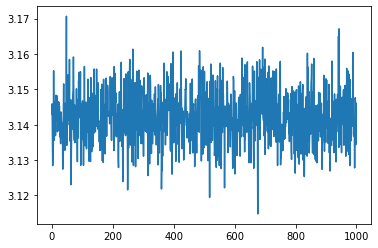

In [75]:
#Total number of runs :
runs = 1000
#Total number of needles :
needles = 100000

#Length of needle :
n_length = 2  

#space between 2 verical lines :
b_width =2

#Calling the main function :
s_tip,N= mtCrl(runs,needles,n_length,b_width)

In [76]:
print(s_tip)

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,

In [77]:
df = pd.DataFrame({'N':N,'acum':s_tip})

print (df)

       N  acum
0      0   1.0
1      1   0.0
2      2   1.0
3      3   0.0
4      4   1.0
..   ...   ...
995  995   1.0
996  996   0.0
997  997   1.0
998  998   1.0
999  999   1.0

[1000 rows x 2 columns]


In [78]:
s = df['acum']
N = df['N']
tip = s.cumsum() / pd.Series(np.arange(1, len(s)+1), s.index)
tip


0      1.000000
1      0.500000
2      0.666667
3      0.500000
4      0.600000
         ...   
995    0.646586
996    0.645938
997    0.646293
998    0.646647
999    0.647000
Length: 1000, dtype: float64

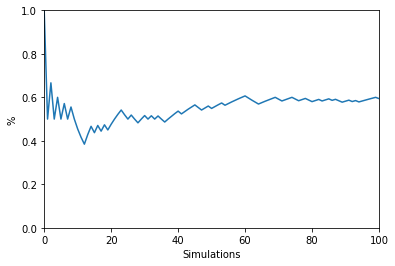

In [81]:
plt.plot(N.T,tip)
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel('Simulations')
plt.ylabel('%')
plt.show()